## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 3s 14ms/step - loss: 2.0892 - accuracy: 0.2566 - val_loss: 1.9364 - val_accuracy: 0.3275
Epoch 2/500
196/196 [==============================] - 3s 13ms/step - loss: 1.8803 - accuracy: 0.3413 - val_loss: 1.8289 - val_accuracy: 0.3580
Epoch 3/500
196/196 [==============================] - 3s 14ms/step - loss: 1.8038 - accuracy: 0.3702 - val_loss: 1.7700 - val_accuracy: 0.3804
Epoch 4/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7570 - accuracy: 0.3867 - val_loss: 1.7343 - val_accuracy: 0.3942
Epoch 5/500
196/196 [==============================] - 3s 13ms/step - loss: 1.7196 - accuracy: 0.4000 - val_loss: 1.6998 - val_accuracy: 0.4057
Epoch 6/500
196/196 [==============================] - 3s 16ms/step - loss: 1.6874 - accuracy: 0.4108 - val_loss: 1.6891 - val_accuracy: 0.4100
Epoch 7/500
196/196 [==============================] - 4s 20ms/step - loss: 1.6583 - accuracy: 0.4214 - val_loss: 1.6429 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 1.0882 - accuracy: 0.6175 - val_loss: 1.4727 - val_accuracy: 0.5010
Epoch 58/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0807 - accuracy: 0.6239 - val_loss: 1.3516 - val_accuracy: 0.5257
Epoch 59/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0745 - accuracy: 0.6238 - val_loss: 1.3709 - val_accuracy: 0.5238
Epoch 60/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0685 - accuracy: 0.6258 - val_loss: 1.3291 - val_accuracy: 0.5354
Epoch 61/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0607 - accuracy: 0.6280 - val_loss: 1.3237 - val_accuracy: 0.5373
Epoch 62/500
196/196 [==============================] - 3s 15ms/step - loss: 1.0514 - accuracy: 0.6336 - val_loss: 1.3225 - val_accuracy: 0.5367
Epoch 63/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0482 - accuracy: 0.6325 - val_loss: 1.4164 - val_accuracy: 0.514

196/196 [==============================] - 3s 13ms/step - loss: 0.7141 - accuracy: 0.7533 - val_loss: 1.5406 - val_accuracy: 0.5216
Epoch 114/500
196/196 [==============================] - 3s 13ms/step - loss: 0.6945 - accuracy: 0.7618 - val_loss: 1.4718 - val_accuracy: 0.5370
Epoch 115/500
196/196 [==============================] - 3s 14ms/step - loss: 0.6944 - accuracy: 0.7613 - val_loss: 1.6066 - val_accuracy: 0.5177
Epoch 116/500
196/196 [==============================] - 3s 13ms/step - loss: 0.6854 - accuracy: 0.7638 - val_loss: 1.5782 - val_accuracy: 0.5164
Epoch 117/500
196/196 [==============================] - 3s 13ms/step - loss: 0.6790 - accuracy: 0.7688 - val_loss: 1.4542 - val_accuracy: 0.5418
Epoch 118/500
196/196 [==============================] - 3s 14ms/step - loss: 0.6726 - accuracy: 0.7660 - val_loss: 1.5238 - val_accuracy: 0.5236
Epoch 119/500
196/196 [==============================] - 3s 13ms/step - loss: 0.6711 - accuracy: 0.7702 - val_loss: 1.9581 - val_accuracy:

196/196 [==============================] - 3s 15ms/step - loss: 0.3816 - accuracy: 0.8782 - val_loss: 1.8120 - val_accuracy: 0.5346
Epoch 170/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3669 - accuracy: 0.8825 - val_loss: 1.8790 - val_accuracy: 0.5285
Epoch 171/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3588 - accuracy: 0.8838 - val_loss: 1.9094 - val_accuracy: 0.5243
Epoch 172/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3773 - accuracy: 0.8759 - val_loss: 1.9670 - val_accuracy: 0.5152
Epoch 173/500
196/196 [==============================] - 3s 15ms/step - loss: 0.3662 - accuracy: 0.8796 - val_loss: 1.8587 - val_accuracy: 0.5349
Epoch 174/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3688 - accuracy: 0.8812 - val_loss: 2.6289 - val_accuracy: 0.4651
Epoch 175/500
196/196 [==============================] - 3s 14ms/step - loss: 0.3794 - accuracy: 0.8756 - val_loss: 2.2252 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.2211 - accuracy: 0.9499 - val_loss: 4.2514 - val_accuracy: 0.4191
Epoch 226/500
196/196 [==============================] - 3s 13ms/step - loss: 0.3720 - accuracy: 0.8731 - val_loss: 2.4675 - val_accuracy: 0.5107
Epoch 227/500
196/196 [==============================] - 3s 13ms/step - loss: 0.1900 - accuracy: 0.9430 - val_loss: 2.4979 - val_accuracy: 0.5156
Epoch 228/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1526 - accuracy: 0.9596 - val_loss: 2.3926 - val_accuracy: 0.5226
Epoch 229/500
196/196 [==============================] - 3s 13ms/step - loss: 0.1611 - accuracy: 0.9564 - val_loss: 2.3949 - val_accuracy: 0.5251
Epoch 230/500
196/196 [==============================] - 3s 13ms/step - loss: 0.1652 - accuracy: 0.9539 - val_loss: 2.5354 - val_accuracy: 0.5049
Epoch 231/500
196/196 [==============================] - 3s 14ms/step - loss: 0.1562 - accuracy: 0.9566 - val_loss: 2.5920 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.1058 - accuracy: 0.9749 - val_loss: 2.6361 - val_accuracy: 0.5217
Epoch 282/500
196/196 [==============================] - 3s 15ms/step - loss: 0.1030 - accuracy: 0.9760 - val_loss: 2.6931 - val_accuracy: 0.5208
Epoch 283/500
196/196 [==============================] - 3s 15ms/step - loss: 0.0933 - accuracy: 0.9800 - val_loss: 2.6926 - val_accuracy: 0.5254
Epoch 284/500
196/196 [==============================] - 3s 15ms/step - loss: 0.1138 - accuracy: 0.9723 - val_loss: 2.7017 - val_accuracy: 0.5213
Epoch 285/500
196/196 [==============================] - 3s 15ms/step - loss: 0.0851 - accuracy: 0.9831 - val_loss: 2.6065 - val_accuracy: 0.5267
Epoch 286/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0794 - accuracy: 0.9849 - val_loss: 2.7159 - val_accuracy: 0.5193
Epoch 287/500
196/196 [==============================] - 3s 16ms/step - loss: 0.0793 - accuracy: 0.9852 - val_loss: 2.6696 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.0183 - accuracy: 0.9993 - val_loss: 3.1739 - val_accuracy: 0.5306
Epoch 338/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0175 - accuracy: 0.9993 - val_loss: 3.1989 - val_accuracy: 0.5257
Epoch 339/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0174 - accuracy: 0.9993 - val_loss: 3.1976 - val_accuracy: 0.5261
Epoch 340/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0169 - accuracy: 0.9993 - val_loss: 3.2050 - val_accuracy: 0.5325
Epoch 341/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0166 - accuracy: 0.9996 - val_loss: 3.2275 - val_accuracy: 0.5281
Epoch 342/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0169 - accuracy: 0.9994 - val_loss: 3.2460 - val_accuracy: 0.5263
Epoch 343/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0163 - accuracy: 0.9993 - val_loss: 3.2482 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.0077 - accuracy: 0.9999 - val_loss: 3.5422 - val_accuracy: 0.5289
Epoch 394/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0076 - accuracy: 0.9999 - val_loss: 3.5367 - val_accuracy: 0.5312
Epoch 395/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 3.5465 - val_accuracy: 0.5307
Epoch 396/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0075 - accuracy: 0.9999 - val_loss: 3.5534 - val_accuracy: 0.5274
Epoch 397/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0074 - accuracy: 0.9999 - val_loss: 3.5511 - val_accuracy: 0.5299
Epoch 398/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0073 - accuracy: 0.9999 - val_loss: 3.5666 - val_accuracy: 0.5289
Epoch 399/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0073 - accuracy: 0.9999 - val_loss: 3.5729 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 3.7639 - val_accuracy: 0.5269
Epoch 450/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 3.7696 - val_accuracy: 0.5272
Epoch 451/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.7699 - val_accuracy: 0.5282
Epoch 452/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.7798 - val_accuracy: 0.5281
Epoch 453/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.7761 - val_accuracy: 0.5279
Epoch 454/500
196/196 [==============================] - 3s 13ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 3.7818 - val_accuracy: 0.5306
Epoch 455/500
196/196 [==============================] - 3s 14ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 3.7822 - val_accuracy:

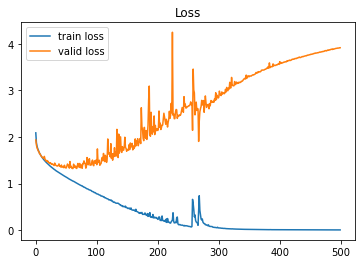

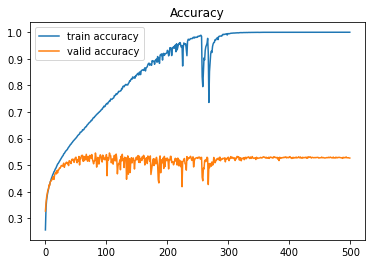

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()